# Logistics Regression (Scratch）

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            -0.900681          1.019004          -1.340227         -1.315444   
1            -1.143017         -0.131979          -1.340227         -1.315444   
2            -1.385353          0.328414          -1.397064         -1.315444   
3            -1.506521          0.098217          -1.283389         -1.315444   
4            -1.021849          1.249201          -1.340227         -1.315444   
..                 ...               ...                ...               ...   
145           1.038005         -0.131979           0.819596          1.448832   
146           0.553333         -1.282963           0.705921          0.922303   
147           0.795669         -0.131979           0.819596          1.053935   
148           0.432165          0.788808           0.933271          1.448832   
149           0.068662         -0.131979           0.762758          0.790671   

       species  
0       se

C:\Users\Ruopeng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


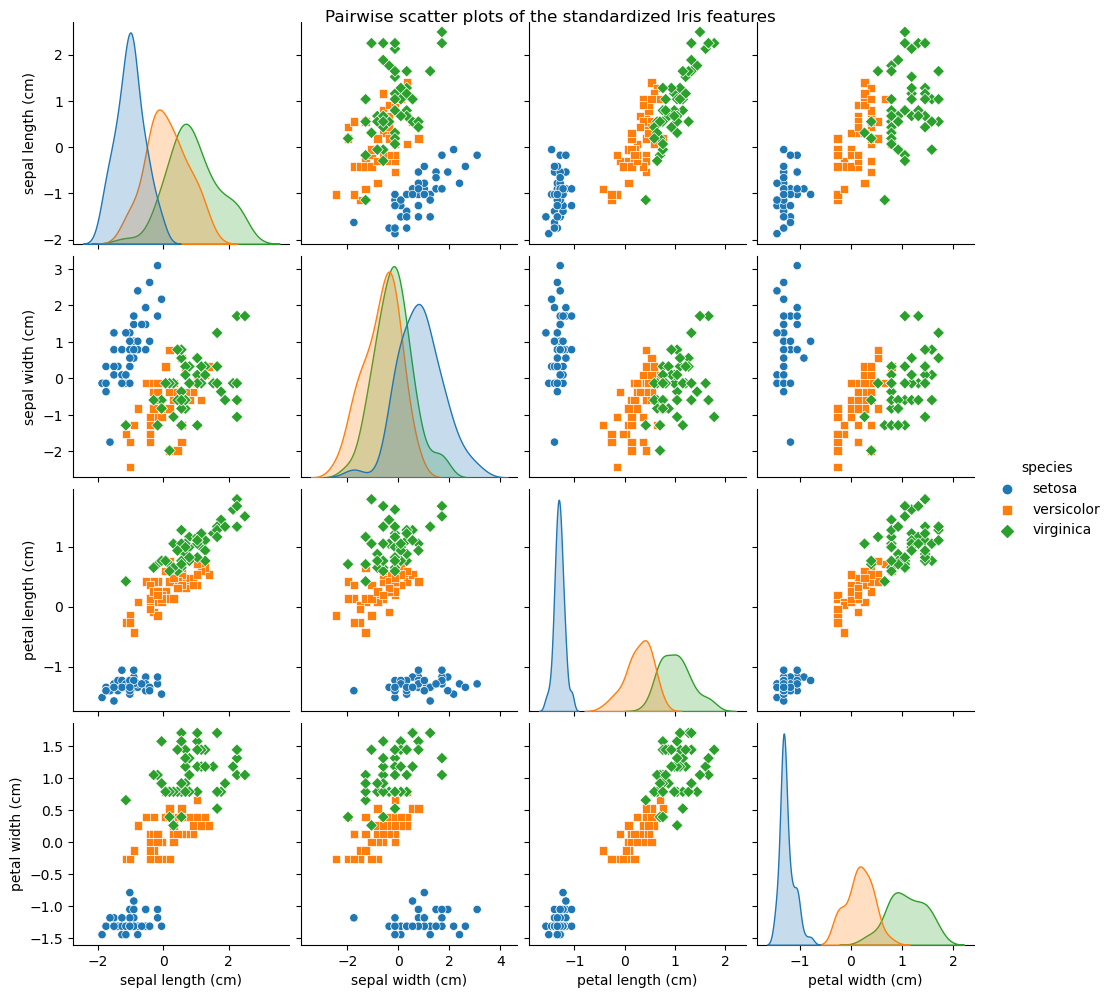

C:\Users\Ruopeng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


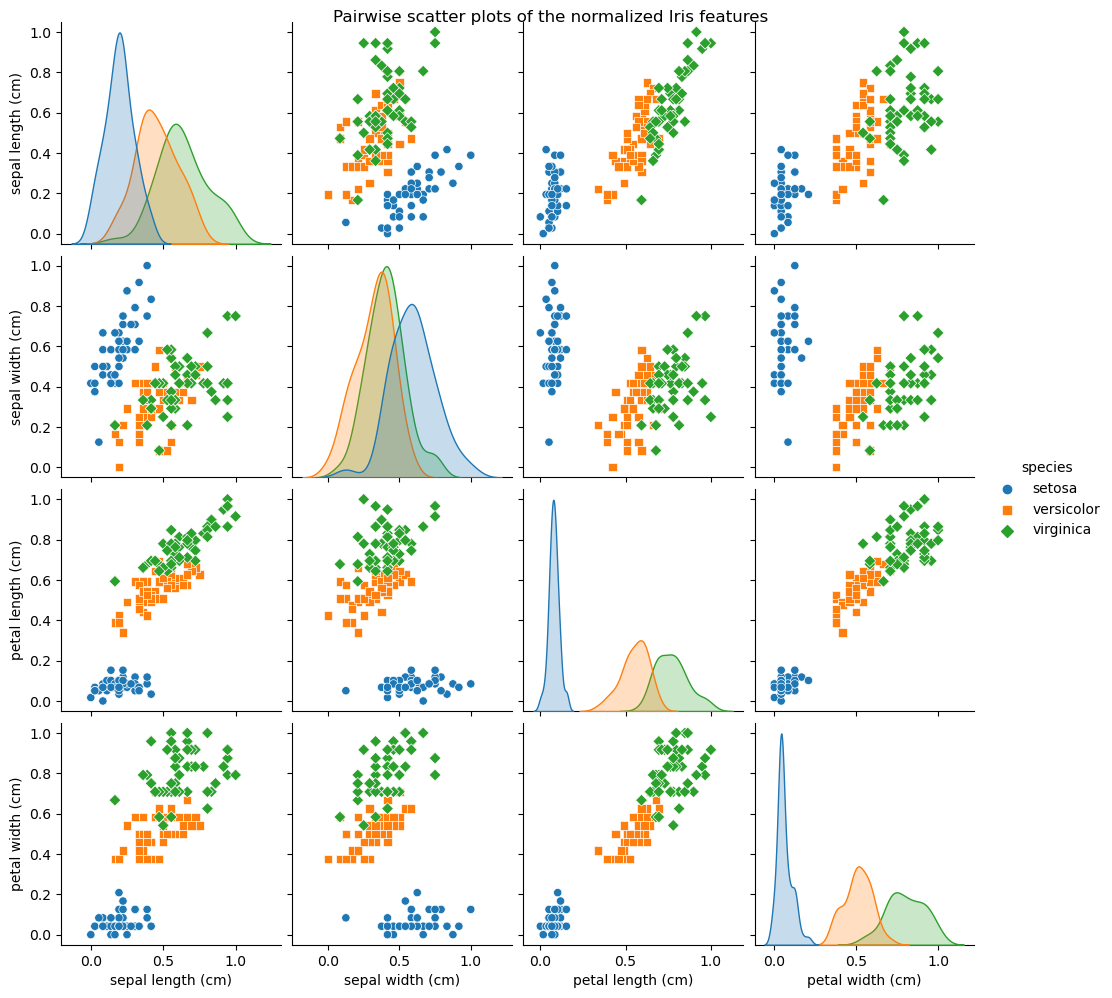

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
#print(df.head())
# Standardization
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_standardized['species'] = df['species']
#print(df_standardized)
# Normalization
scaler_normalize = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_normalize.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_normalized['species'] = df['species']
print(df_standardized)
# Visualize the standardized data
sns.pairplot(df_standardized, hue="species", markers=["o", "s", "D"])
plt.suptitle('Pairwise scatter plots of the standardized Iris features', verticalalignment='bottom')
plt.show()

# Visualize the normalized data
sns.pairplot(df_normalized, hue="species", markers=["o", "s", "D"])
plt.suptitle('Pairwise scatter plots of the normalized Iris features', verticalalignment='bottom')
plt.show()





In [2]:
# Convert labels to one-hot encoding
X = df_standardized.drop('species', axis=1)  # Features
y = df_standardized['species']              # Labels
print(X)
print(y)
def manual_label_encode(y):
    
    unique_classes = np.unique(y)
    class_to_int = {key: idx for idx, key in enumerate(unique_classes)}

    integer_encoded = np.array([class_to_int[item] for item in y])
    return integer_encoded
def manual_one_hot_encode(y):
    # Conversion to integer encoding
    integer_encoded = manual_label_encode(y)

    # Creating One Hot Codes
    one_hot = np.zeros((integer_encoded.size, integer_encoded.max() + 1))
    one_hot[np.arange(integer_encoded.size), integer_encoded] = 1
    return one_hot

y_one_hot = manual_one_hot_encode(y)
print(y_one_hot)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
print(y_train)



     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]
0         setosa
1         setosa
2     

In [3]:
# Softmax function
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-12)) / m
    return loss

# Gradient computation
def compute_gradients(X, y, y_pred):
    m = X.shape[0]
    dz = y_pred - y
    dw = np.dot(X.T, dz) / m
    return dw

# Update weights
def update_weights(w, dw, learning_rate=0.01):
    w -= learning_rate * dw
    return w

# Training logistic regression from scratch
def train_logistic_regression(X, y, learning_rate=0.01, epochs=100):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.random.rand(X.shape[1], y.shape[1])
    for epoch in range(epochs):
        scores = np.dot(X, weights)
        predictions = softmax(scores)
        loss = cross_entropy_loss(predictions, y)
        gradients = compute_gradients(X, y, predictions)
        weights = update_weights(weights, gradients, learning_rate)
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    return weights

# Train the model
weights = train_logistic_regression(X_train, y_train,epochs = 10000)

# Prediction
def predict(X, weights):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    scores = np.dot(X, weights)
    predictions = softmax(scores)
    return np.argmax(predictions, axis=1)

# Evaluate the model
y_pred_train = predict(X_train, weights)
y_pred_test = predict(X_test, weights)

# Convert one-hot to labels for accuracy calculation
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
train_accuracy = np.mean(y_pred_train == y_train_labels)
test_accuracy = np.mean(y_pred_test == y_test_labels)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_labels, y_pred_test, average='macro')
recall = recall_score(y_test_labels, y_pred_test, average='macro')
f1 = f1_score(y_test_labels, y_pred_test, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




Epoch 0, Loss: 1.1419323191180208
Epoch 10, Loss: 1.0576709905735724
Epoch 20, Loss: 0.9851257972440781
Epoch 30, Loss: 0.9227995869717718
Epoch 40, Loss: 0.8693033777830483
Epoch 50, Loss: 0.8233637430883654
Epoch 60, Loss: 0.7838355236673894
Epoch 70, Loss: 0.7497110360216215
Epoch 80, Loss: 0.7201213878257865
Epoch 90, Loss: 0.6943298811568032
Epoch 100, Loss: 0.6717198068870586
Epoch 110, Loss: 0.6517794043856232
Epoch 120, Loss: 0.6340862411245043
Epoch 130, Loss: 0.6182924696059904
Epoch 140, Loss: 0.6041117160127498
Epoch 150, Loss: 0.5913078624491164
Epoch 160, Loss: 0.5796856909079142
Epoch 170, Loss: 0.5690832088890944
Epoch 180, Loss: 0.559365420341693
Epoch 190, Loss: 0.5504193009338426
Epoch 200, Loss: 0.542149757273709
Epoch 210, Loss: 0.5344763801169232
Epoch 220, Loss: 0.5273308334893304
Epoch 230, Loss: 0.5206547510537877
Epoch 240, Loss: 0.5143980364186684
Epoch 250, Loss: 0.5085174851524338
Epoch 260, Loss: 0.502975663354653
Epoch 270, Loss: 0.49773999128770596
Epoch

Epoch 8440, Loss: 0.1541100279391744
Epoch 8450, Loss: 0.15402508234927084
Epoch 8460, Loss: 0.15394028863353282
Epoch 8470, Loss: 0.1538556463813213
Epoch 8480, Loss: 0.153771155183471
Epoch 8490, Loss: 0.1536868146322841
Epoch 8500, Loss: 0.15360262432152325
Epoch 8510, Loss: 0.1535185838464055
Epoch 8520, Loss: 0.1534346928035955
Epoch 8530, Loss: 0.15335095079119912
Epoch 8540, Loss: 0.15326735740875694
Epoch 8550, Loss: 0.15318391225723813
Epoch 8560, Loss: 0.1531006149390339
Epoch 8570, Loss: 0.15301746505795089
Epoch 8580, Loss: 0.15293446221920554
Epoch 8590, Loss: 0.15285160602941733
Epoch 8600, Loss: 0.1527688960966026
Epoch 8610, Loss: 0.15268633203016857
Epoch 8620, Loss: 0.15260391344090712
Epoch 8630, Loss: 0.15252163994098855
Epoch 8640, Loss: 0.15243951114395551
Epoch 8650, Loss: 0.15235752666471705
Epoch 8660, Loss: 0.15227568611954256
Epoch 8670, Loss: 0.1521939891260558
Epoch 8680, Loss: 0.15211243530322877
Epoch 8690, Loss: 0.152031024271376
Epoch 8700, Loss: 0.1519

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



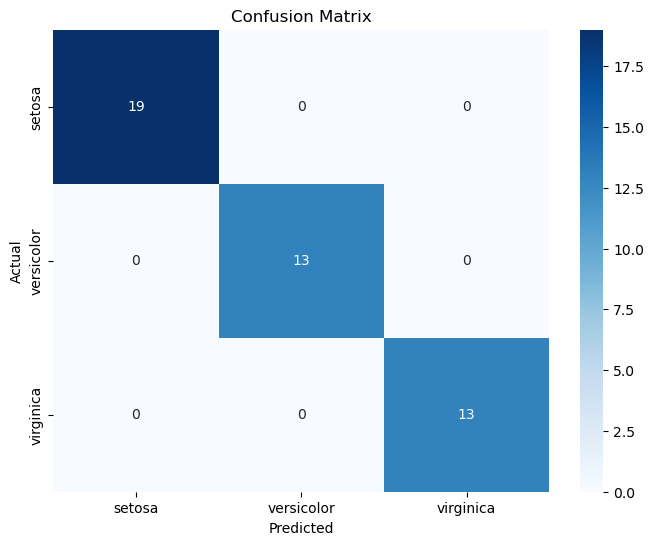

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
y_test_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_labels, y_pred_test)

report = classification_report(y_test_labels, y_pred_test, target_names=iris.target_names)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [5]:
from sklearn.model_selection import KFold

def cross_validate(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    # Make sure X and y are numpy array
    X_np = X if isinstance(X, np.ndarray) else X.values
    y_np = y if isinstance(y, np.ndarray) else y.values

    for train_index, test_index in kf.split(X_np):
        X_train, X_test = X_np[train_index], X_np[test_index]
        y_train, y_test = y_np[train_index], y_np[test_index]
                
        
        
        weights = train_logistic_regression(X_train, y_train, epochs=10000)
        
        y_pred_test = predict(X_test, weights)
        y_test_labels = np.argmax(y_test, axis=1)
        accuracy = np.mean(y_pred_test == y_test_labels)
        accuracies.append(accuracy)
    
    return np.mean(accuracies)

# Perform cross-validation
cv_accuracy = cross_validate(X, y_one_hot)
print("Cross-Validation Accuracy:", cv_accuracy)

Epoch 0, Loss: 1.0304223528194205
Epoch 10, Loss: 0.9455127196014528
Epoch 20, Loss: 0.8753613655263072
Epoch 30, Loss: 0.8174035146868598
Epoch 40, Loss: 0.7693440281414012
Epoch 50, Loss: 0.7292391854930861
Epoch 60, Loss: 0.6955021122166497
Epoch 70, Loss: 0.6668664227694272
Epoch 80, Loss: 0.6423341224623221
Epoch 90, Loss: 0.6211228964856165
Epoch 100, Loss: 0.6026196799312052
Epoch 110, Loss: 0.5863425629207986
Epoch 120, Loss: 0.5719107374960676
Epoch 130, Loss: 0.559021296947651
Epoch 140, Loss: 0.5474315225991236
Epoch 150, Loss: 0.5369454197347369
Epoch 160, Loss: 0.5274034845576266
Epoch 170, Loss: 0.5186749059634342
Epoch 180, Loss: 0.5106515960872543
Epoch 190, Loss: 0.5032435949547887
Epoch 200, Loss: 0.49637551048200845
Epoch 210, Loss: 0.4899837419756723
Epoch 220, Loss: 0.48401429972812743
Epoch 230, Loss: 0.4784210808425071
Epoch 240, Loss: 0.47316449645991643
Epoch 250, Loss: 0.4682103714149752
Epoch 260, Loss: 0.46352905648495274
Epoch 270, Loss: 0.4590947076251064


Epoch 9000, Loss: 0.13458155497376184
Epoch 9010, Loss: 0.134510141275386
Epoch 9020, Loss: 0.134438852217151
Epoch 9030, Loss: 0.13436768746898523
Epoch 9040, Loss: 0.1342966467019755
Epoch 9050, Loss: 0.13422572958836237
Epoch 9060, Loss: 0.13415493580153495
Epoch 9070, Loss: 0.13408426501602583
Epoch 9080, Loss: 0.13401371690750644
Epoch 9090, Loss: 0.13394329115278172
Epoch 9100, Loss: 0.1338729874297855
Epoch 9110, Loss: 0.1338028054175755
Epoch 9120, Loss: 0.13373274479632846
Epoch 9130, Loss: 0.1336628052473355
Epoch 9140, Loss: 0.13359298645299697
Epoch 9150, Loss: 0.1335232880968179
Epoch 9160, Loss: 0.13345370986340327
Epoch 9170, Loss: 0.13338425143845312
Epoch 9180, Loss: 0.1333149125087579
Epoch 9190, Loss: 0.13324569276219392
Epoch 9200, Loss: 0.1331765918877184
Epoch 9210, Loss: 0.13310760957536516
Epoch 9220, Loss: 0.1330387455162398
Epoch 9230, Loss: 0.13296999940251514
Epoch 9240, Loss: 0.1329013709274266
Epoch 9250, Loss: 0.1328328597852679
Epoch 9260, Loss: 0.132764

Epoch 7840, Loss: 0.1493813329612146
Epoch 7850, Loss: 0.14929021695646286
Epoch 7860, Loss: 0.14919927282031478
Epoch 7870, Loss: 0.14910850005543724
Epoch 7880, Loss: 0.1490178981664067
Epoch 7890, Loss: 0.14892746665970005
Epoch 7900, Loss: 0.14883720504368553
Epoch 7910, Loss: 0.14874711282861378
Epoch 7920, Loss: 0.14865718952660897
Epoch 7930, Loss: 0.14856743465165975
Epoch 7940, Loss: 0.14847784771961056
Epoch 7950, Loss: 0.14838842824815276
Epoch 7960, Loss: 0.148299175756816
Epoch 7970, Loss: 0.14821008976695937
Epoch 7980, Loss: 0.148121169801763
Epoch 7990, Loss: 0.1480324153862191
Epoch 8000, Loss: 0.1479438260471239
Epoch 8010, Loss: 0.1478554013130687
Epoch 8020, Loss: 0.14776714071443167
Epoch 8030, Loss: 0.14767904378336955
Epoch 8040, Loss: 0.14759111005380895
Epoch 8050, Loss: 0.14750333906143845
Epoch 8060, Loss: 0.14741573034369998
Epoch 8070, Loss: 0.1473282834397809
Epoch 8080, Loss: 0.14724099789060568
Epoch 8090, Loss: 0.1471538732388278
Epoch 8100, Loss: 0.147

Epoch 6580, Loss: 0.1464488794701791
Epoch 6590, Loss: 0.1463294553572337
Epoch 6600, Loss: 0.14621030547848873
Epoch 6610, Loss: 0.14609142888223098
Epoch 6620, Loss: 0.14597282462109032
Epoch 6630, Loss: 0.14585449175201518
Epoch 6640, Loss: 0.14573642933624875
Epoch 6650, Loss: 0.14561863643930464
Epoch 6660, Loss: 0.1455011121309434
Epoch 6670, Loss: 0.1453838554851484
Epoch 6680, Loss: 0.1452668655801029
Epoch 6690, Loss: 0.14515014149816607
Epoch 6700, Loss: 0.14503368232585037
Epoch 6710, Loss: 0.14491748715379804
Epoch 6720, Loss: 0.1448015550767585
Epoch 6730, Loss: 0.14468588519356523
Epoch 6740, Loss: 0.14457047660711375
Epoch 6750, Loss: 0.14445532842433847
Epoch 6760, Loss: 0.14434043975619099
Epoch 6770, Loss: 0.14422580971761745
Epoch 6780, Loss: 0.14411143742753688
Epoch 6790, Loss: 0.14399732200881904
Epoch 6800, Loss: 0.1438834625882629
Epoch 6810, Loss: 0.14376985829657488
Epoch 6820, Loss: 0.14365650826834742
Epoch 6830, Loss: 0.14354341164203782
Epoch 6840, Loss: 0

Epoch 5440, Loss: 0.15404204413622857
Epoch 5450, Loss: 0.15389179269270165
Epoch 5460, Loss: 0.15374194243195646
Epoch 5470, Loss: 0.15359249175897738
Epoch 5480, Loss: 0.15344343908702088
Epoch 5490, Loss: 0.153294782837563
Epoch 5500, Loss: 0.15314652144024699
Epoch 5510, Loss: 0.15299865333283175
Epoch 5520, Loss: 0.15285117696114034
Epoch 5530, Loss: 0.15270409077900882
Epoch 5540, Loss: 0.15255739324823583
Epoch 5550, Loss: 0.15241108283853205
Epoch 5560, Loss: 0.1522651580274708
Epoch 5570, Loss: 0.15211961730043785
Epoch 5580, Loss: 0.15197445915058294
Epoch 5590, Loss: 0.15182968207877057
Epoch 5600, Loss: 0.15168528459353173
Epoch 5610, Loss: 0.15154126521101602
Epoch 5620, Loss: 0.15139762245494356
Epoch 5630, Loss: 0.1512543548565582
Epoch 5640, Loss: 0.15111146095457995
Epoch 5650, Loss: 0.15096893929515873
Epoch 5660, Loss: 0.150826788431828
Epoch 5670, Loss: 0.1506850069254587
Epoch 5680, Loss: 0.1505435933442138
Epoch 5690, Loss: 0.15040254626350288
Epoch 5700, Loss: 0.

Epoch 4100, Loss: 0.1862213428838813
Epoch 4110, Loss: 0.1860180863143129
Epoch 4120, Loss: 0.1858154700334777
Epoch 4130, Loss: 0.1856134910788983
Epoch 4140, Loss: 0.1854121465060955
Epoch 4150, Loss: 0.18521143338844792
Epoch 4160, Loss: 0.18501134881705283
Epoch 4170, Loss: 0.18481188990058833
Epoch 4180, Loss: 0.184613053765177
Epoch 4190, Loss: 0.1844148375542511
Epoch 4200, Loss: 0.18421723842841908
Epoch 4210, Loss: 0.18402025356533336
Epoch 4220, Loss: 0.1838238801595595
Epoch 4230, Loss: 0.18362811542244684
Epoch 4240, Loss: 0.1834329565820002
Epoch 4250, Loss: 0.18323840088275337
Epoch 4260, Loss: 0.18304444558564287
Epoch 4270, Loss: 0.18285108796788407
Epoch 4280, Loss: 0.18265832532284812
Epoch 4290, Loss: 0.1824661549599399
Epoch 4300, Loss: 0.18227457420447718
Epoch 4310, Loss: 0.1820835803975715
Epoch 4320, Loss: 0.1818931708960096
Epoch 4330, Loss: 0.1817033430721364
Epoch 4340, Loss: 0.1815140943137388
Epoch 4350, Loss: 0.18132542202393082
Epoch 4360, Loss: 0.1811373

# Logistics Regression (Library）

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy scores for each fold: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean accuracy: 0.9600000000000002
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



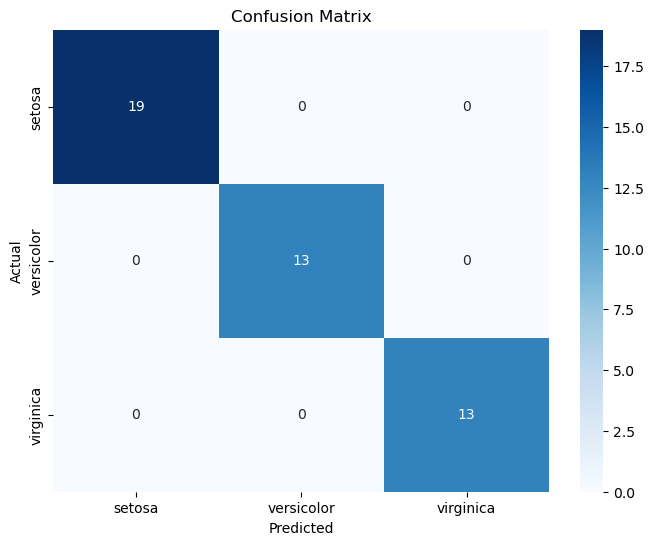

In [6]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns




# Split the dataset into training and testing sets
# 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
# Standardization improves the convergence of the logistic regression algorithm
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
# Using 'multinomial' for multi-class classification and 'lbfgs' solver which handles multinomial loss
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
# Confusion matrix to see the performance of the classification
cm = confusion_matrix(y_test, y_pred)

# Classification report for detailed metrics
report = classification_report(y_test, y_pred, target_names=iris.target_names)

precision = precision_score(y_test_labels, y_pred_test, average='macro')
recall = recall_score(y_test_labels, y_pred_test, average='macro')
f1 = f1_score(y_test_labels, y_pred_test, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print out the mean accuracy and the accuracy of each fold
print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", scores.mean())

# Print the evaluation results
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()